<a href="https://colab.research.google.com/github/Lukarusja/TSEDogVgg/blob/main/vgg16_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pathlib

data_dir = "/content/drive/MyDrive/DogBreedSerious/extracted_dog_photos/train/"
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

10222


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16

vgg=VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import tensorflow.keras as keras

x = Flatten()(vgg.output)
prediction = Dense(120,activation='softmax')(x)
model = keras.Model(inputs = vgg.input, outputs = prediction)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.2, horizontal_flip=True, vertical_flip = True, preprocessing_function=preprocess_input)

In [ ]:
batch_size=32
train_generator = gen.flow_from_directory(
    directory="/content/drive/My Drive/Dog_Breed_Identification/train_full/breed/",
    target_size = (224, 224),
    shuffle = True,
    batch_size=batch_size,
)
batch_size=32
valid_generator = gen.flow_from_directory(
    directory="/content/drive/My Drive/Dog_Breed_Identification/valid_sorted/breed/",
    target_size = (224, 224),
    shuffle = True,
    batch_size=batch_size,
)

Found 8177 images belonging to 120 classes.
Found 2045 images belonging to 120 classes.


In [ ]:
import torch
use_cuda = torch.cuda.is_available()
print(use_cuda)

if use_cuda:
    model = model.cuda()

True


AttributeError: ignored

In [ ]:
import glob

epochs = 3

train_path = "/content/drive/My Drive/Dog_Breed_Identification/train_full/breed/"
valid_path = "/content/drive/My Drive/Dog_Breed_Identification/valid_sorted/breed/"
image_files = glob.glob(train_path + '/*/*.jpg')
valid_image_files = glob.glob(valid_path + '/*/*.jpg')

r = model.fit_generator(
    train_generator,
    validation_data = valid_generator,
    epochs = epochs,
    steps_per_epoch = len(image_files) // batch_size,
    validation_steps = len(valid_image_files) // batch_size,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
255/255 [==============================] - 3405s 13s/step - loss: 58.6244 - accuracy: 0.2194 - val_loss: 59.7108 - val_accuracy: 0.2465
Epoch 2/3
255/255 [==============================] - 144s 564ms/step - loss: 49.1986 - accuracy: 0.3576 - val_loss: 59.2520 - val_accuracy: 0.2927
Epoch 3/3
255/255 [==============================] - 144s 566ms/step - loss: 44.6957 - accuracy: 0.4205 - val_loss: 63.2034 - val_accuracy: 0.3294


In [ ]:
STEP_SIZE_TEST = valid_generator.n//valid_generator.batch_size
valid_generator.reset()
pred = model.predict_generator(valid_generator, steps = STEP_SIZE_TEST, verbose=1)

import numpy as np

predicted_class_indices = np.argmax(pred,axis=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


63/63 [==============================] - 29s 456ms/step


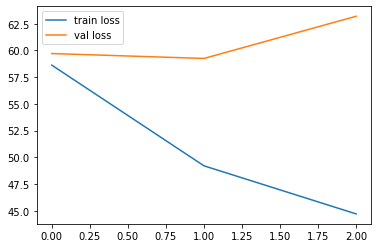

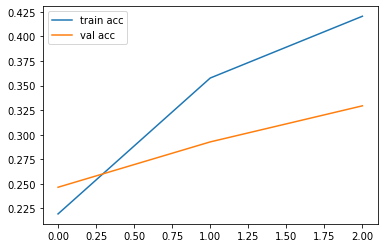

In [ ]:
plt.plot(r.history['loss'], label ='train loss')
plt.plot(r.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label ='train acc')
plt.plot(r.history['val_accuracy'], label ='val acc')
plt.legend()
plt.show()

In [ ]:
import glob

epochs = 20

train_path = "/content/drive/My Drive/Dog_Breed_Identification/train_full/breed/"
valid_path = "/content/drive/My Drive/Dog_Breed_Identification/valid_sorted/breed/"
image_files = glob.glob(train_path + '/*/*.jpg')
valid_image_files = glob.glob(valid_path + '/*/*.jpg')

r = model.fit_generator(
    train_generator,
    validation_data = valid_generator,
    epochs = epochs,
    steps_per_epoch = len(image_files) // batch_size,
    validation_steps = len(valid_image_files) // batch_size,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
255/255 [==============================] - 145s 567ms/step - loss: 40.8272 - accuracy: 0.4814 - val_loss: 66.4867 - val_accuracy: 0.3328
Epoch 2/20
255/255 [==============================] - 144s 565ms/step - loss: 37.9905 - accuracy: 0.5188 - val_loss: 68.6811 - val_accuracy: 0.3616
Epoch 3/20
255/255 [==============================] - 144s 566ms/step - loss: 35.6985 - accuracy: 0.5486 - val_loss: 67.0959 - val_accuracy: 0.3646
Epoch 4/20
255/255 [==============================] - 144s 566ms/step - loss: 33.9662 - accuracy: 0.5714 - val_loss: 70.5210 - val_accuracy: 0.3795
Epoch 5/20
255/255 [==============================] - 144s 567ms/step - loss: 31.3772 - accuracy: 0.5978 - val_loss: 72.1156 - val_accuracy: 0.3814
Epoch 6/20
255/255 [==============================] - 144s 565ms/step - loss: 29.6299 - accuracy: 0.6252 - val_loss: 73.6525 - val_accuracy: 0.3929
Epoch 7/20
255/255 [==============================] - 144s 566ms/step - loss: 29.5608 - accuracy: 0.6336 - val_l

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

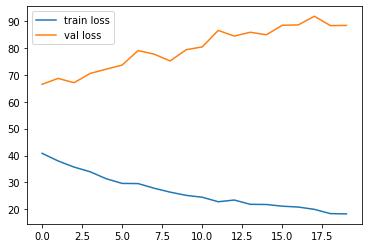

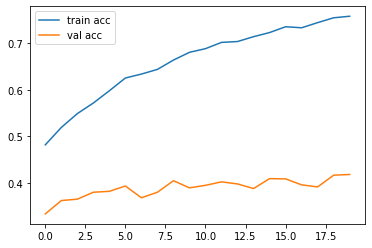

In [ ]:
plt.plot(r.history['loss'], label ='train loss')
plt.plot(r.history['val_loss'], label ='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label ='train acc')
plt.plot(r.history['val_accuracy'], label ='val acc')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

labels_df = pd.read_csv("drive/My Drive/Dog_Breed_Identification/labels.csv")
breed = labels_df["breed"].unique()
#print(breed)
class_names = [item.replace("_", " ")for item in breed]
print(class_names)

['boston bull', 'dingo', 'pekinese', 'bluetick', 'golden retriever', 'bedlington terrier', 'borzoi', 'basenji', 'scottish deerhound', 'shetland sheepdog', 'walker hound', 'maltese dog', 'norfolk terrier', 'african hunting dog', 'wire-haired fox terrier', 'redbone', 'lakeland terrier', 'boxer', 'doberman', 'otterhound', 'standard schnauzer', 'irish water spaniel', 'black-and-tan coonhound', 'cairn', 'affenpinscher', 'labrador retriever', 'ibizan hound', 'english setter', 'weimaraner', 'giant schnauzer', 'groenendael', 'dhole', 'toy poodle', 'border terrier', 'tibetan terrier', 'norwegian elkhound', 'shih-tzu', 'irish terrier', 'kuvasz', 'german shepherd', 'greater swiss mountain dog', 'basset', 'australian terrier', 'schipperke', 'rhodesian ridgeback', 'irish setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature schnauzer', 'brittany spaniel', 'kelpie', 'papillon', 'border collie', 'entlebucher', 'collie', 'malamute', 'welsh springer spaniel', 'chihuahua', 'saluki', 'pug', 'malino

In [ ]:
def run_app(img_path):
  img = keras.preprocessing.image.load_img(img_path, target_size=(224,224))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  print(class_names[np.argmax(score)])

In [ ]:
run_app('/content/drive/My Drive/Dog_Breed_Identification/cairn.jpg')

boston bull


In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/Dog_Breed_Identification/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])